In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset.load import load_df, select_feature
from dataset.preprocess import *

In [2]:
df = select_feature()
print(f"Dataframe shape: {df.shape}")
df.head(3)

Dataframe shape: (22740, 10)


,RemoteWork,EdLevel,YearsCodePro,DevType,LanguageHaveWorkedWith,PlatformHaveWorkedWith,ToolsTechHaveWorkedWith,Country,Age,Salary
10,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Developer, full-stack;Developer, back-end",Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,AWS;Microsoft Azure,Docker;npm;Terraform,United Kingdom of Great Britain and Northern I...,18-24 years old,60307.0
12,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",C;HTML/CSS;Rust;SQL;Swift;TypeScript,AWS,Docker,United States of America,25-34 years old,65000.0
14,Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, full-stack;Academic researcher;DevO...",HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,AWS;DigitalOcean;Heroku,Docker;npm;Yarn,United States of America,25-34 years old,110000.0


# `Age`

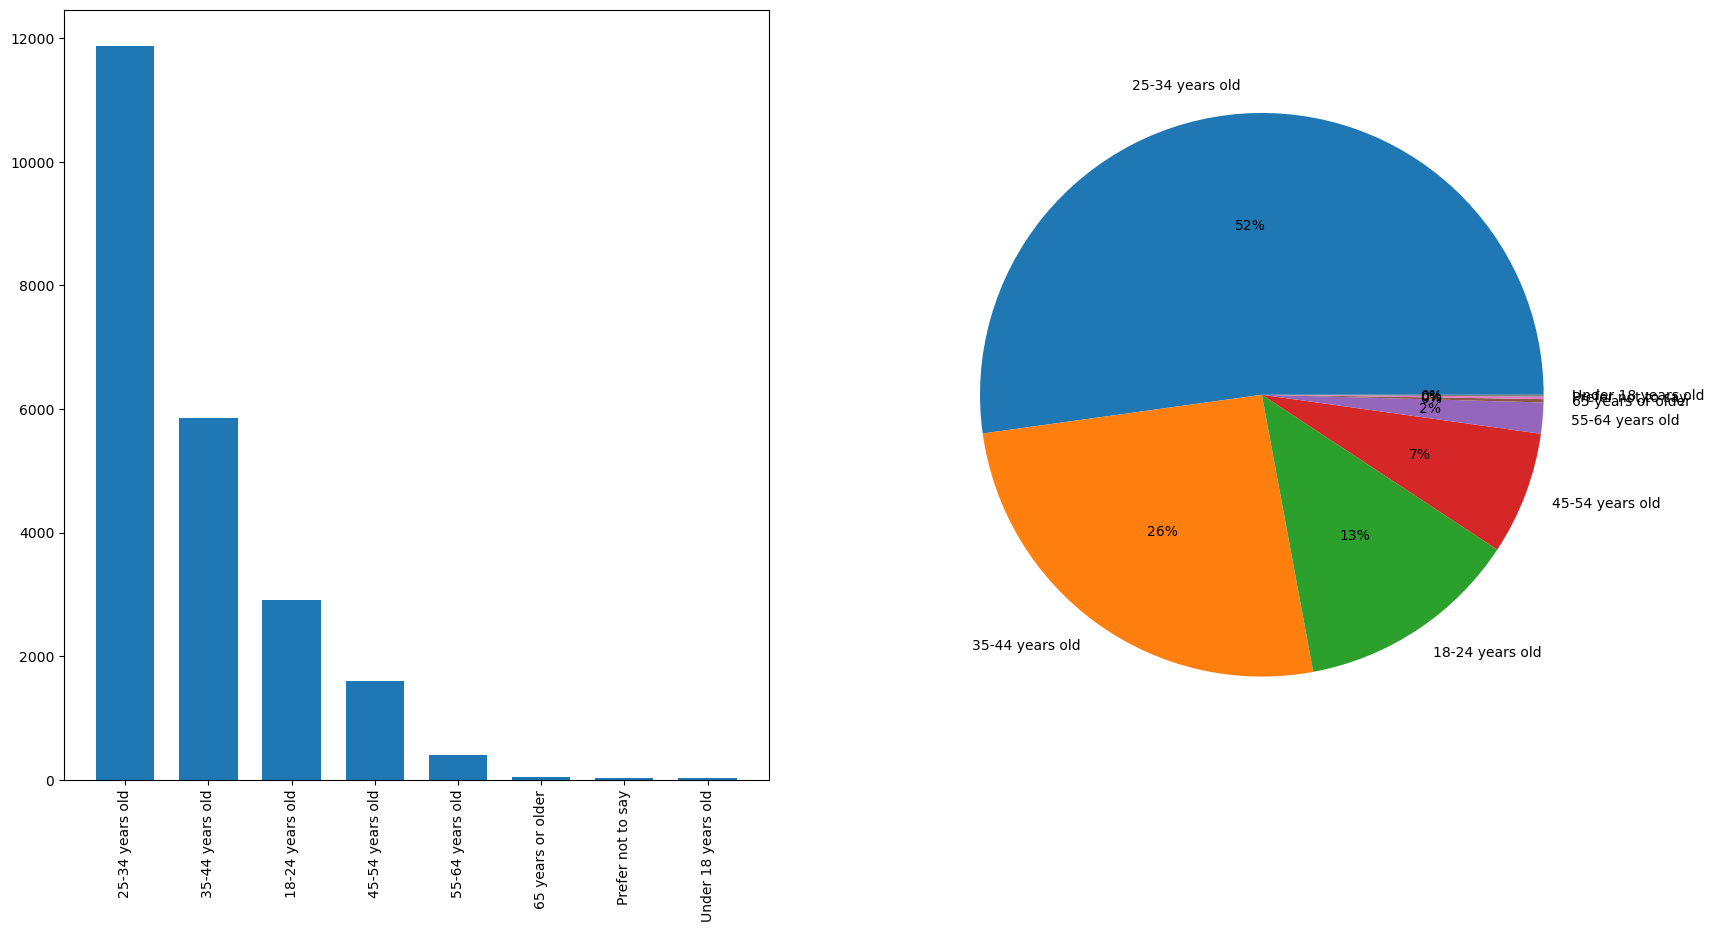

In [3]:
age = df["Age"].value_counts()

label = age.index
value = age.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

# `RemoteWork`

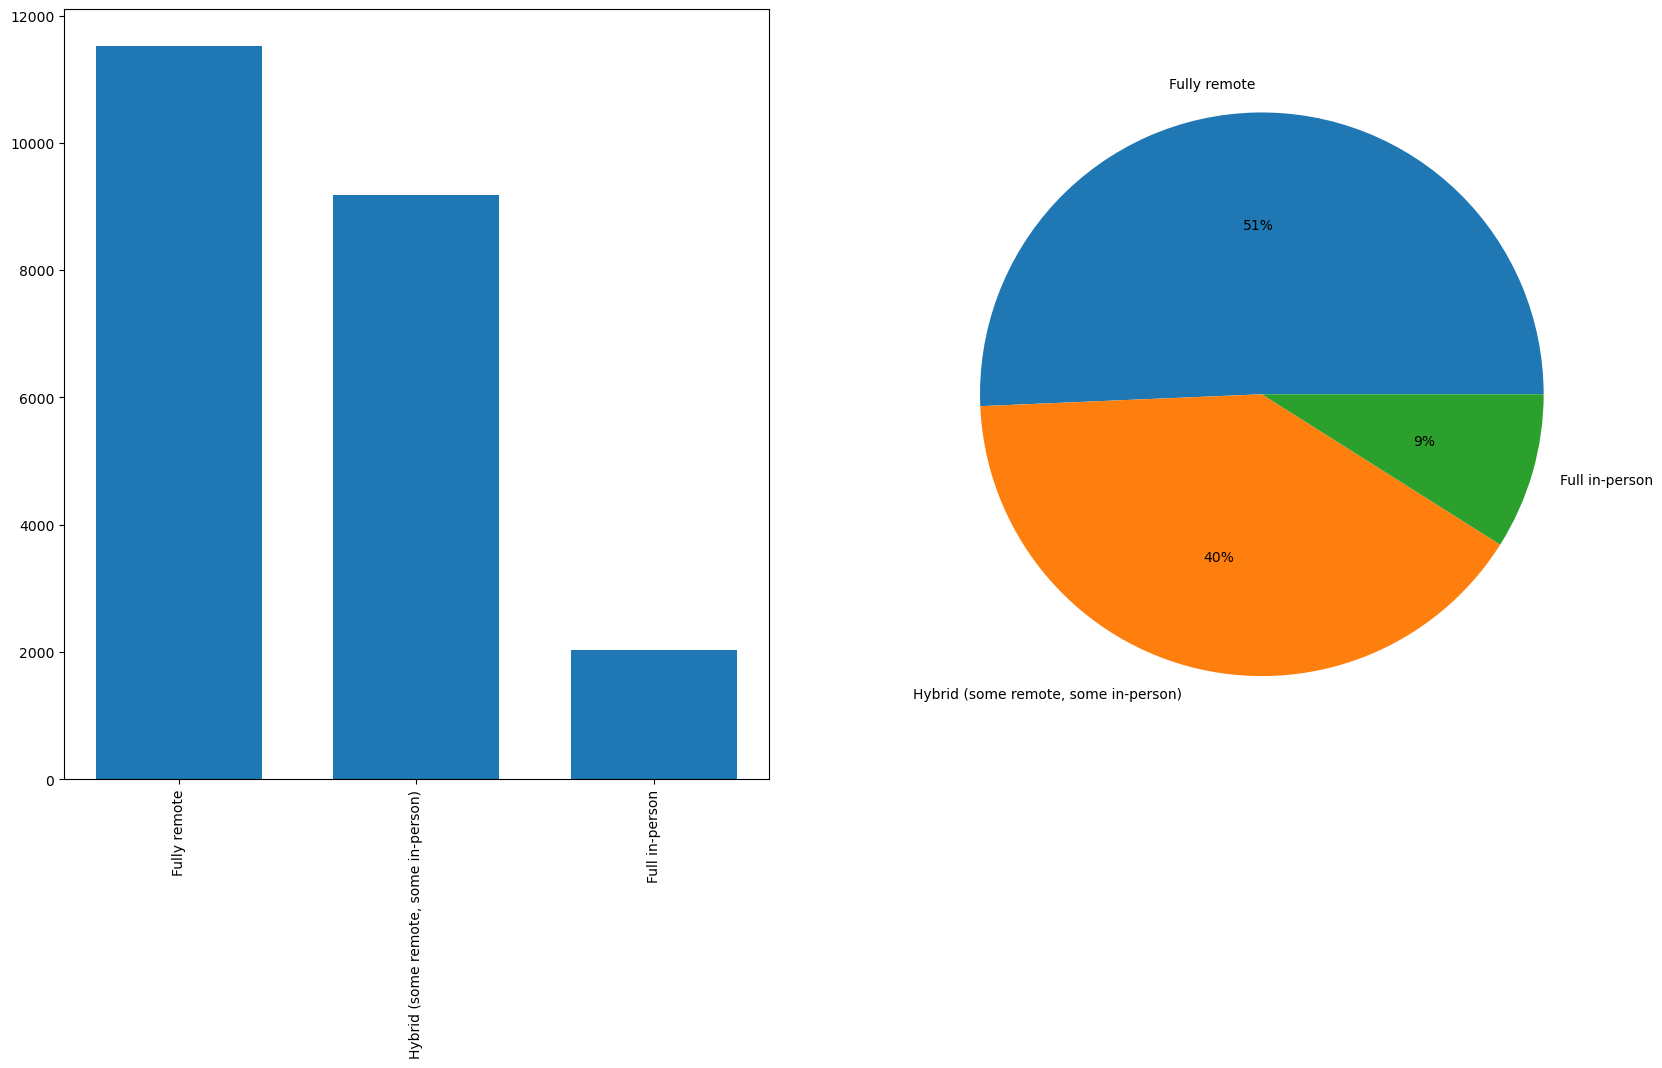

In [4]:
remote = df["RemoteWork"].value_counts()

label = remote.index
value = remote.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

# `EdLevel`

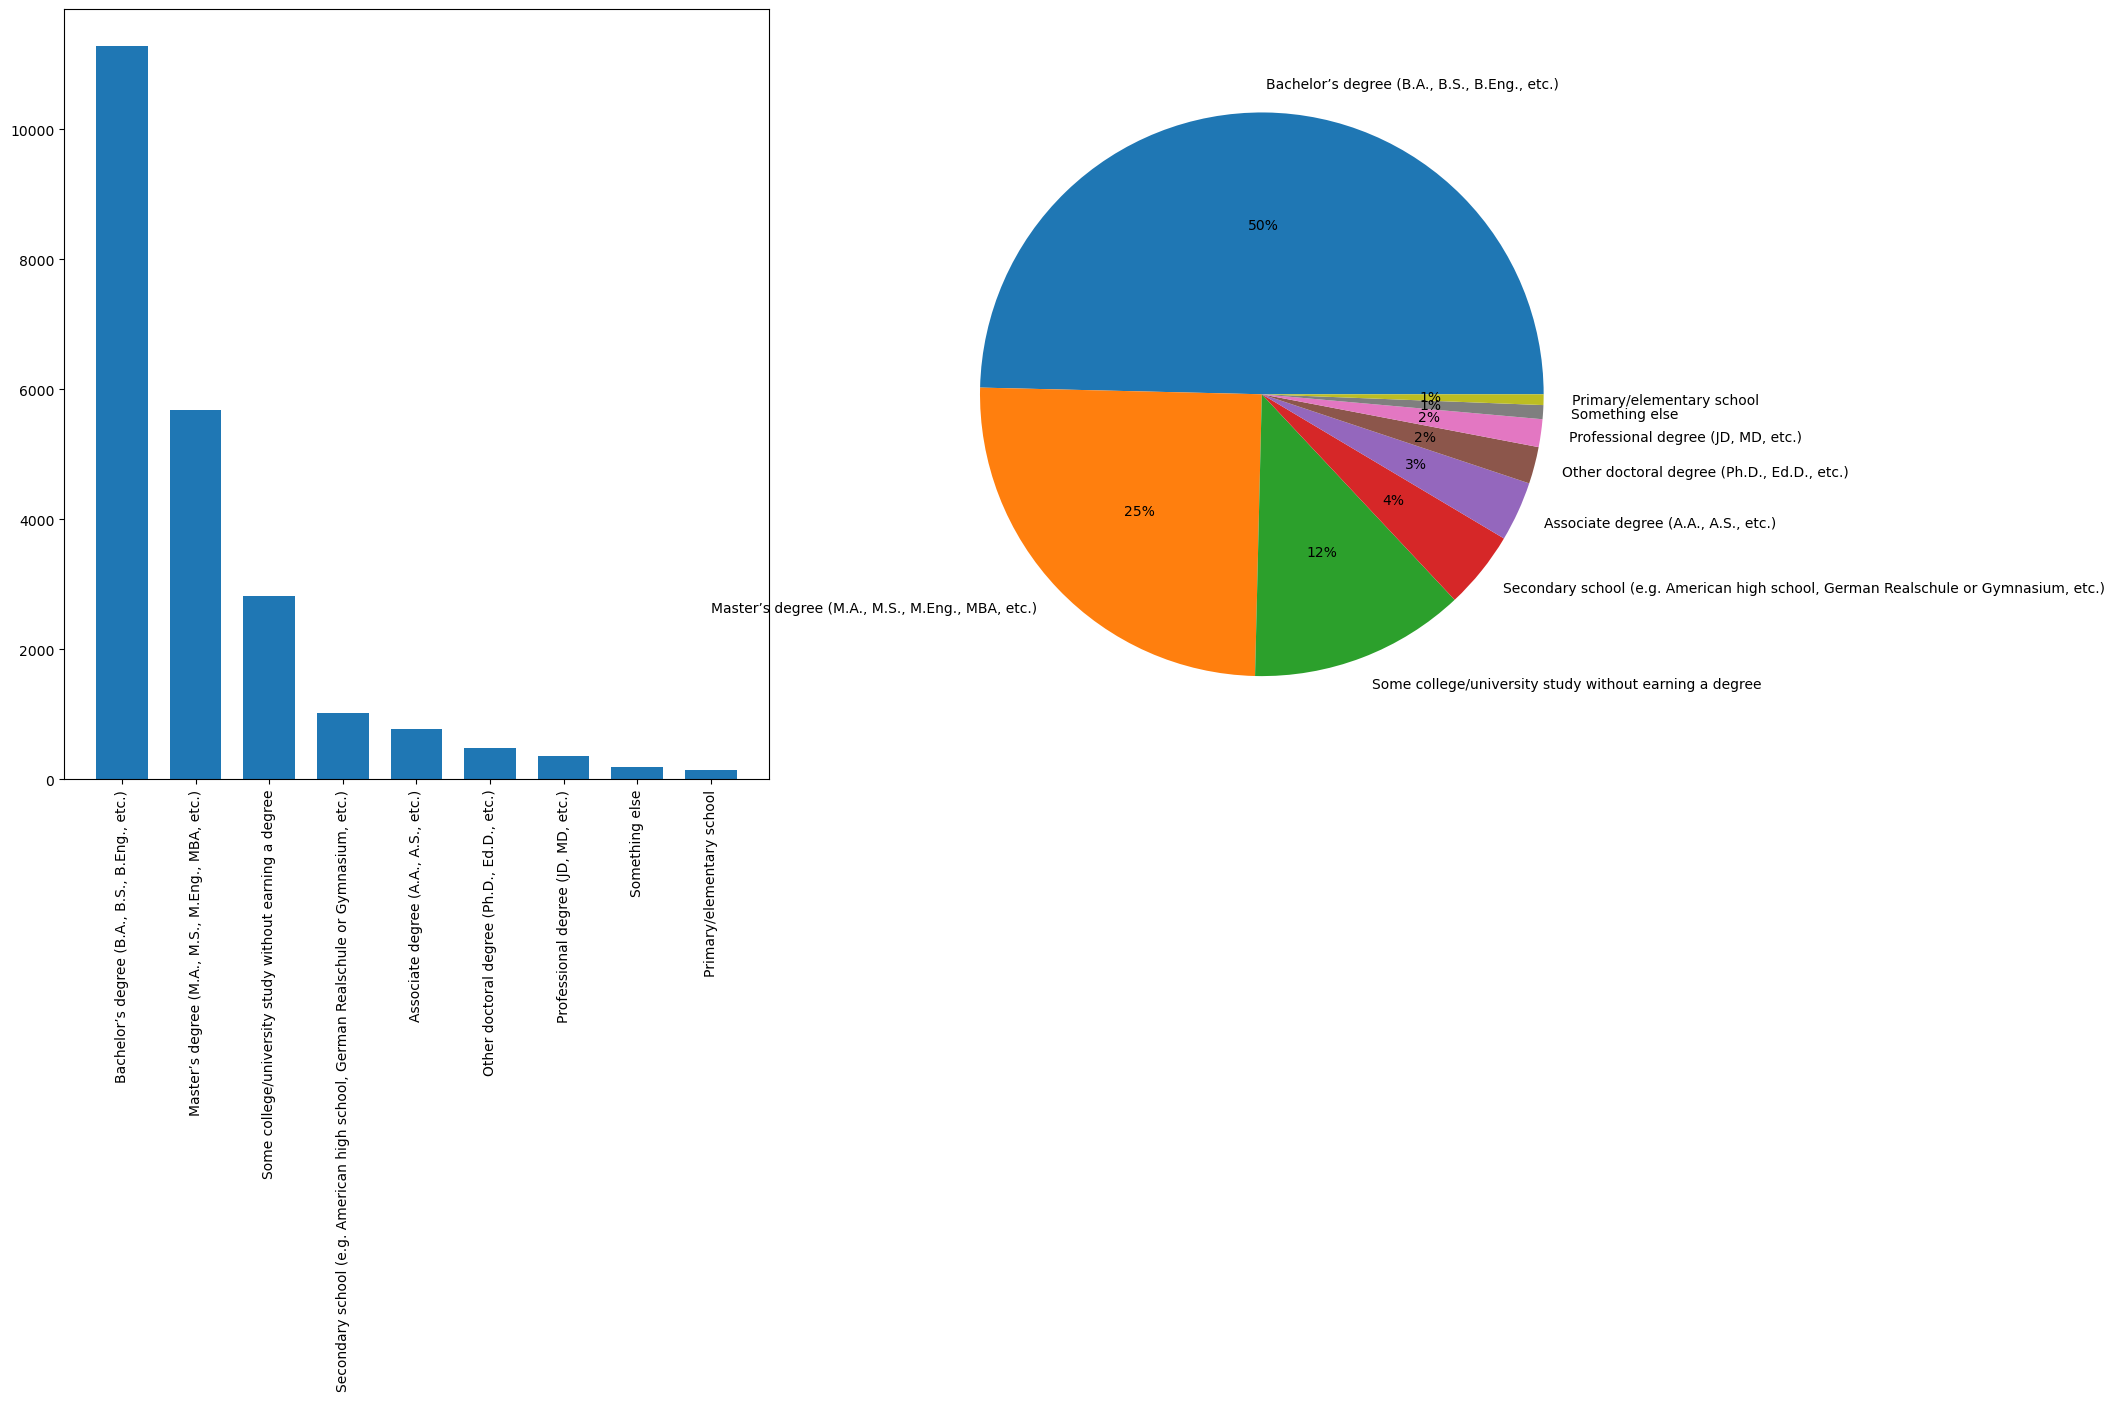

In [5]:
ed = df["EdLevel"].value_counts()

label = ed.index
value = ed.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

In [6]:
df["EdLevel"] = df["EdLevel"].apply(clean_education)

# `Country`

In [7]:
country_map = shorten_categories(df["Country"].value_counts(), 200)
df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

United States of America                                5400
Other                                                   5394
United Kingdom of Great Britain and Northern Ireland    1661
Germany                                                 1442
India                                                   1333
Canada                                                   978
Brazil                                                   850
France                                                   798
Spain                                                    591
Poland                                                   587
Netherlands                                              547
Australia                                                514
Italy                                                    445
Sweden                                                   378
Turkey                                                   287
Israel                                                   258
Switzerland             

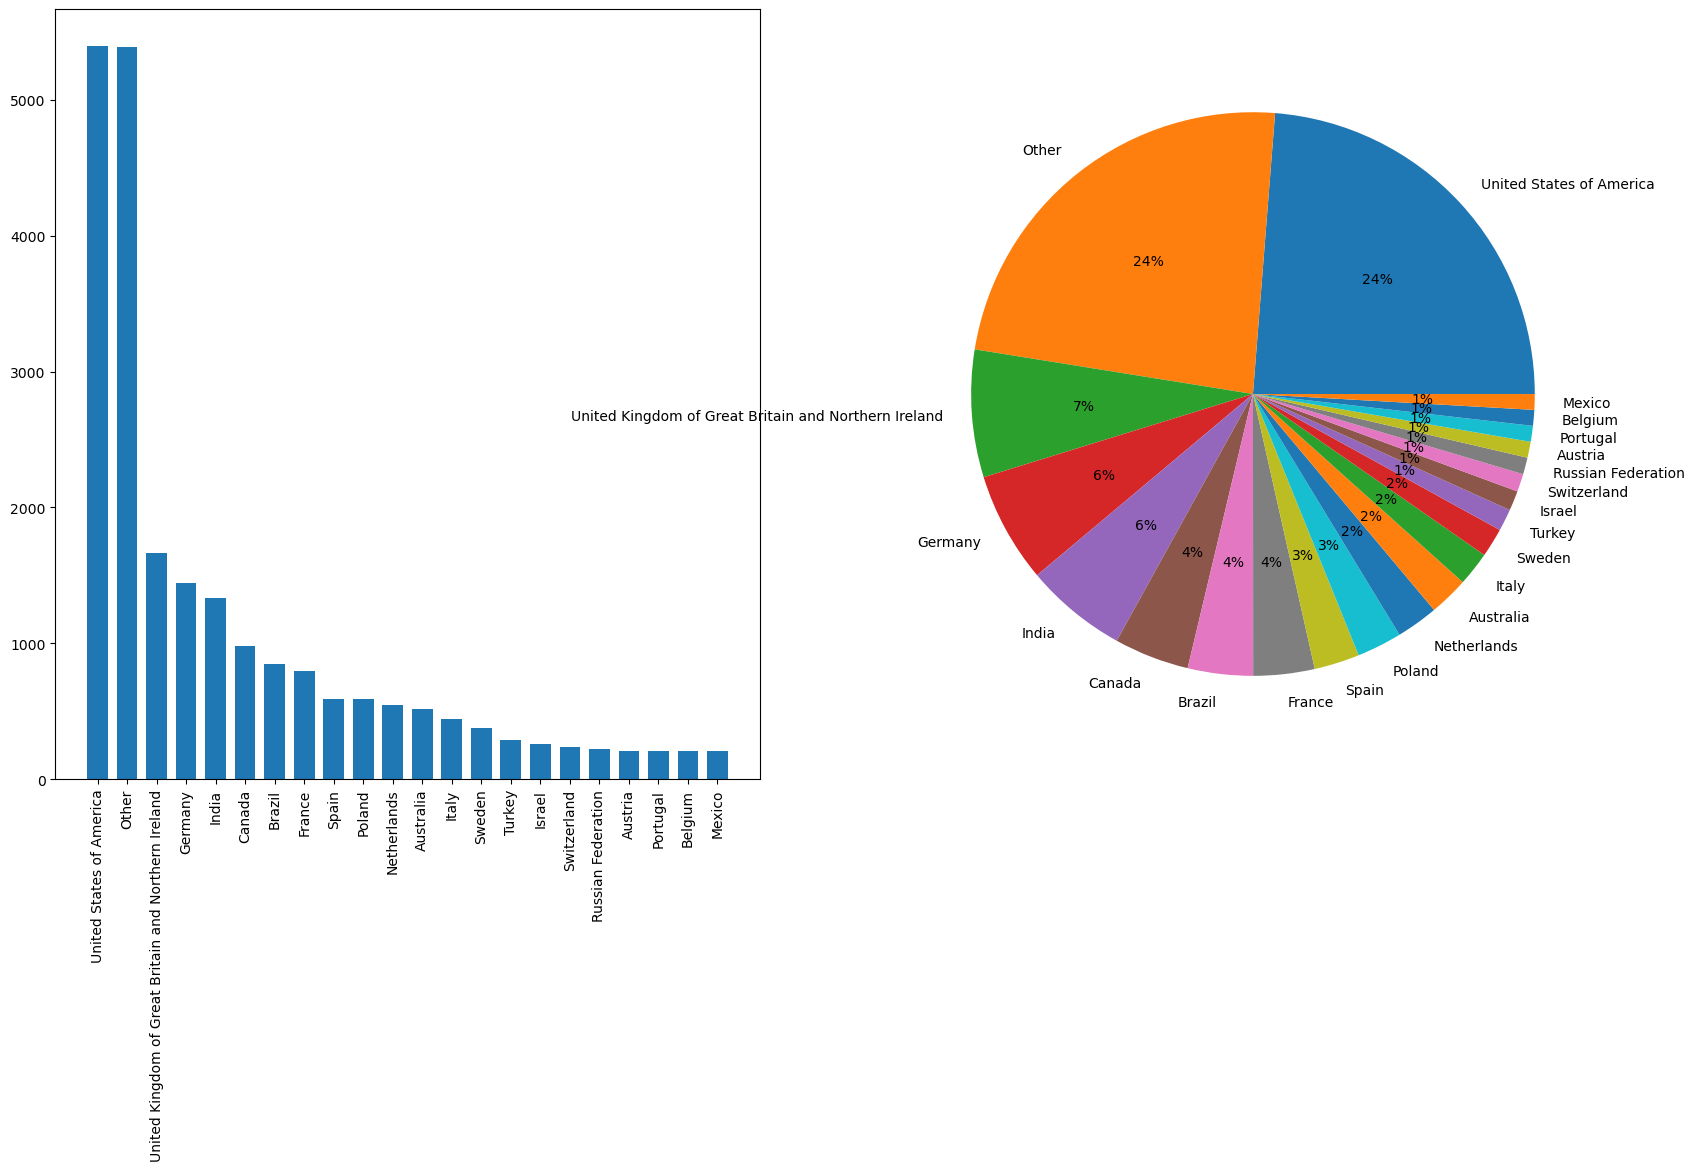

In [8]:
country = df["Country"].value_counts()

label = country.index
value = country.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

# `YearCodePro`

In [9]:
df["YearCodePro"] = df["YearsCodePro"].apply(YearCodeProProcess)

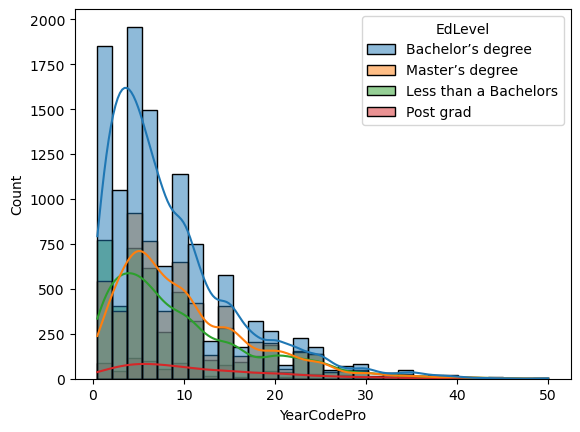

In [10]:
sns.histplot(data=df, x="YearCodePro", hue="EdLevel", kde=True, bins=30)
plt.show()

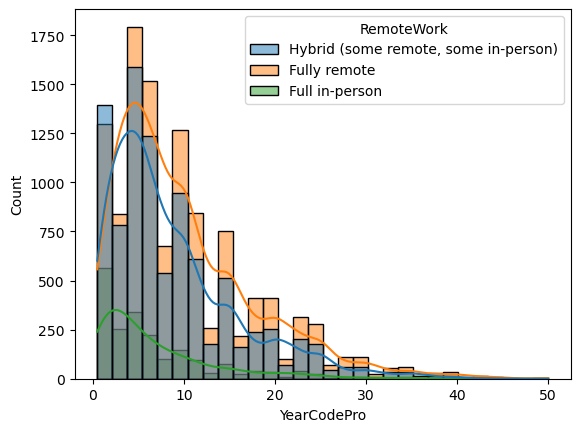

In [11]:
sns.histplot(data=df, x="YearCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

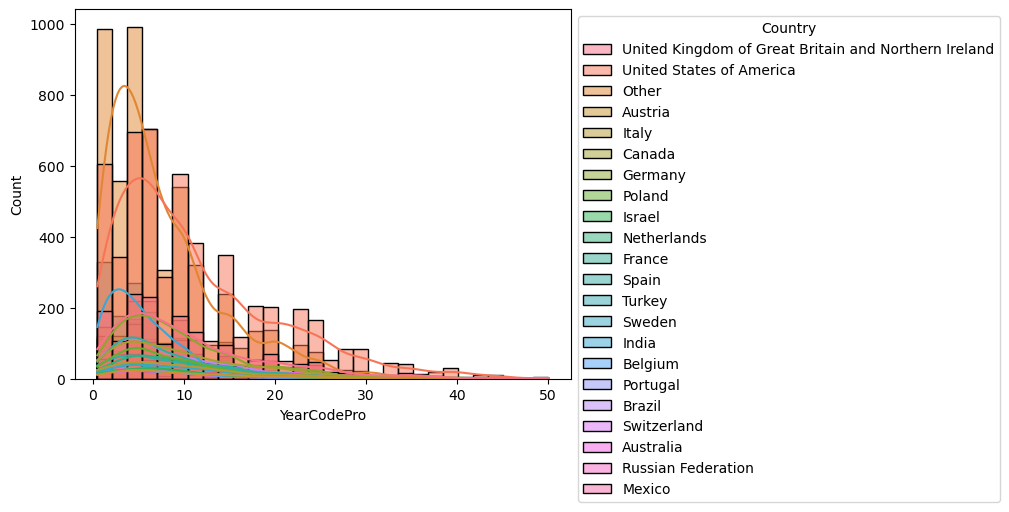

In [12]:
ax = sns.histplot(data=df, x="YearCodePro", hue="Country", kde=True, bins=30)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# `DevType`

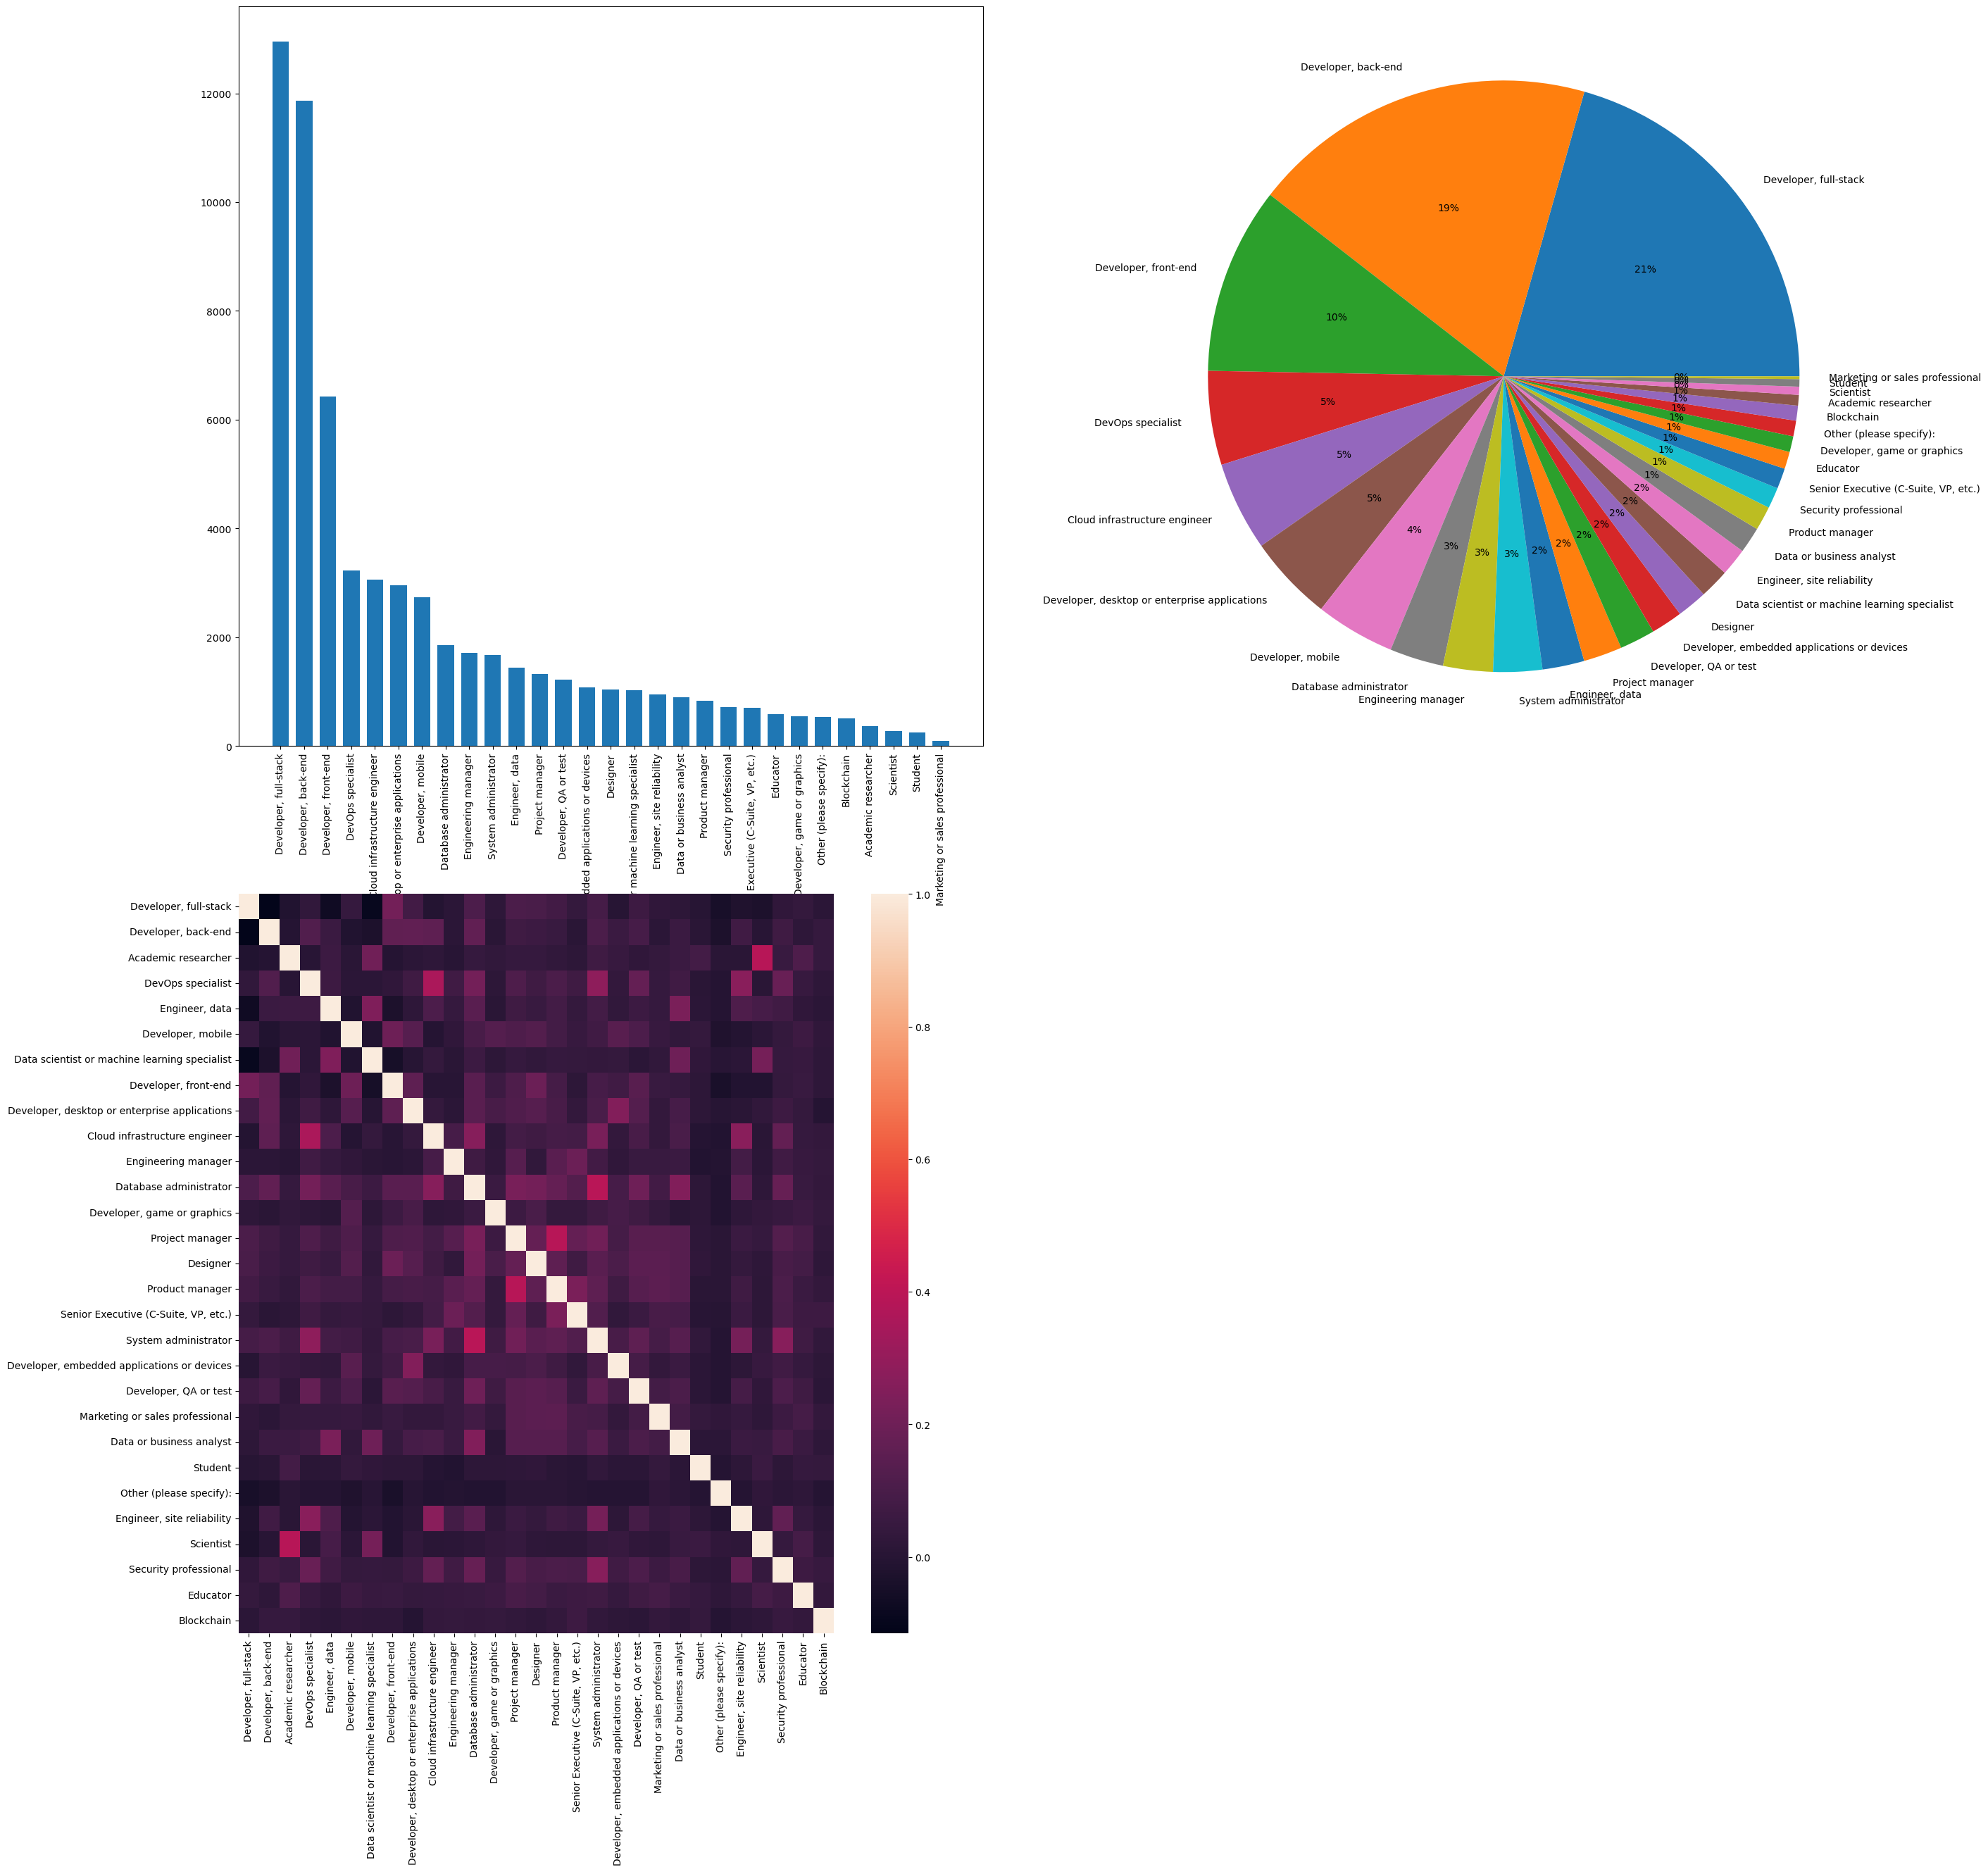

In [13]:
dev_type = split_multicolumn(df["DevType"])
dev_type_sum = dev_type.sum().sort_values(ascending=False)
label = dev_type_sum.index
value = dev_type_sum.values

plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.subplot(2,2,3)
sns.heatmap(dev_type.corr())

plt.show()

# `LanguageHaveWorkedWith`

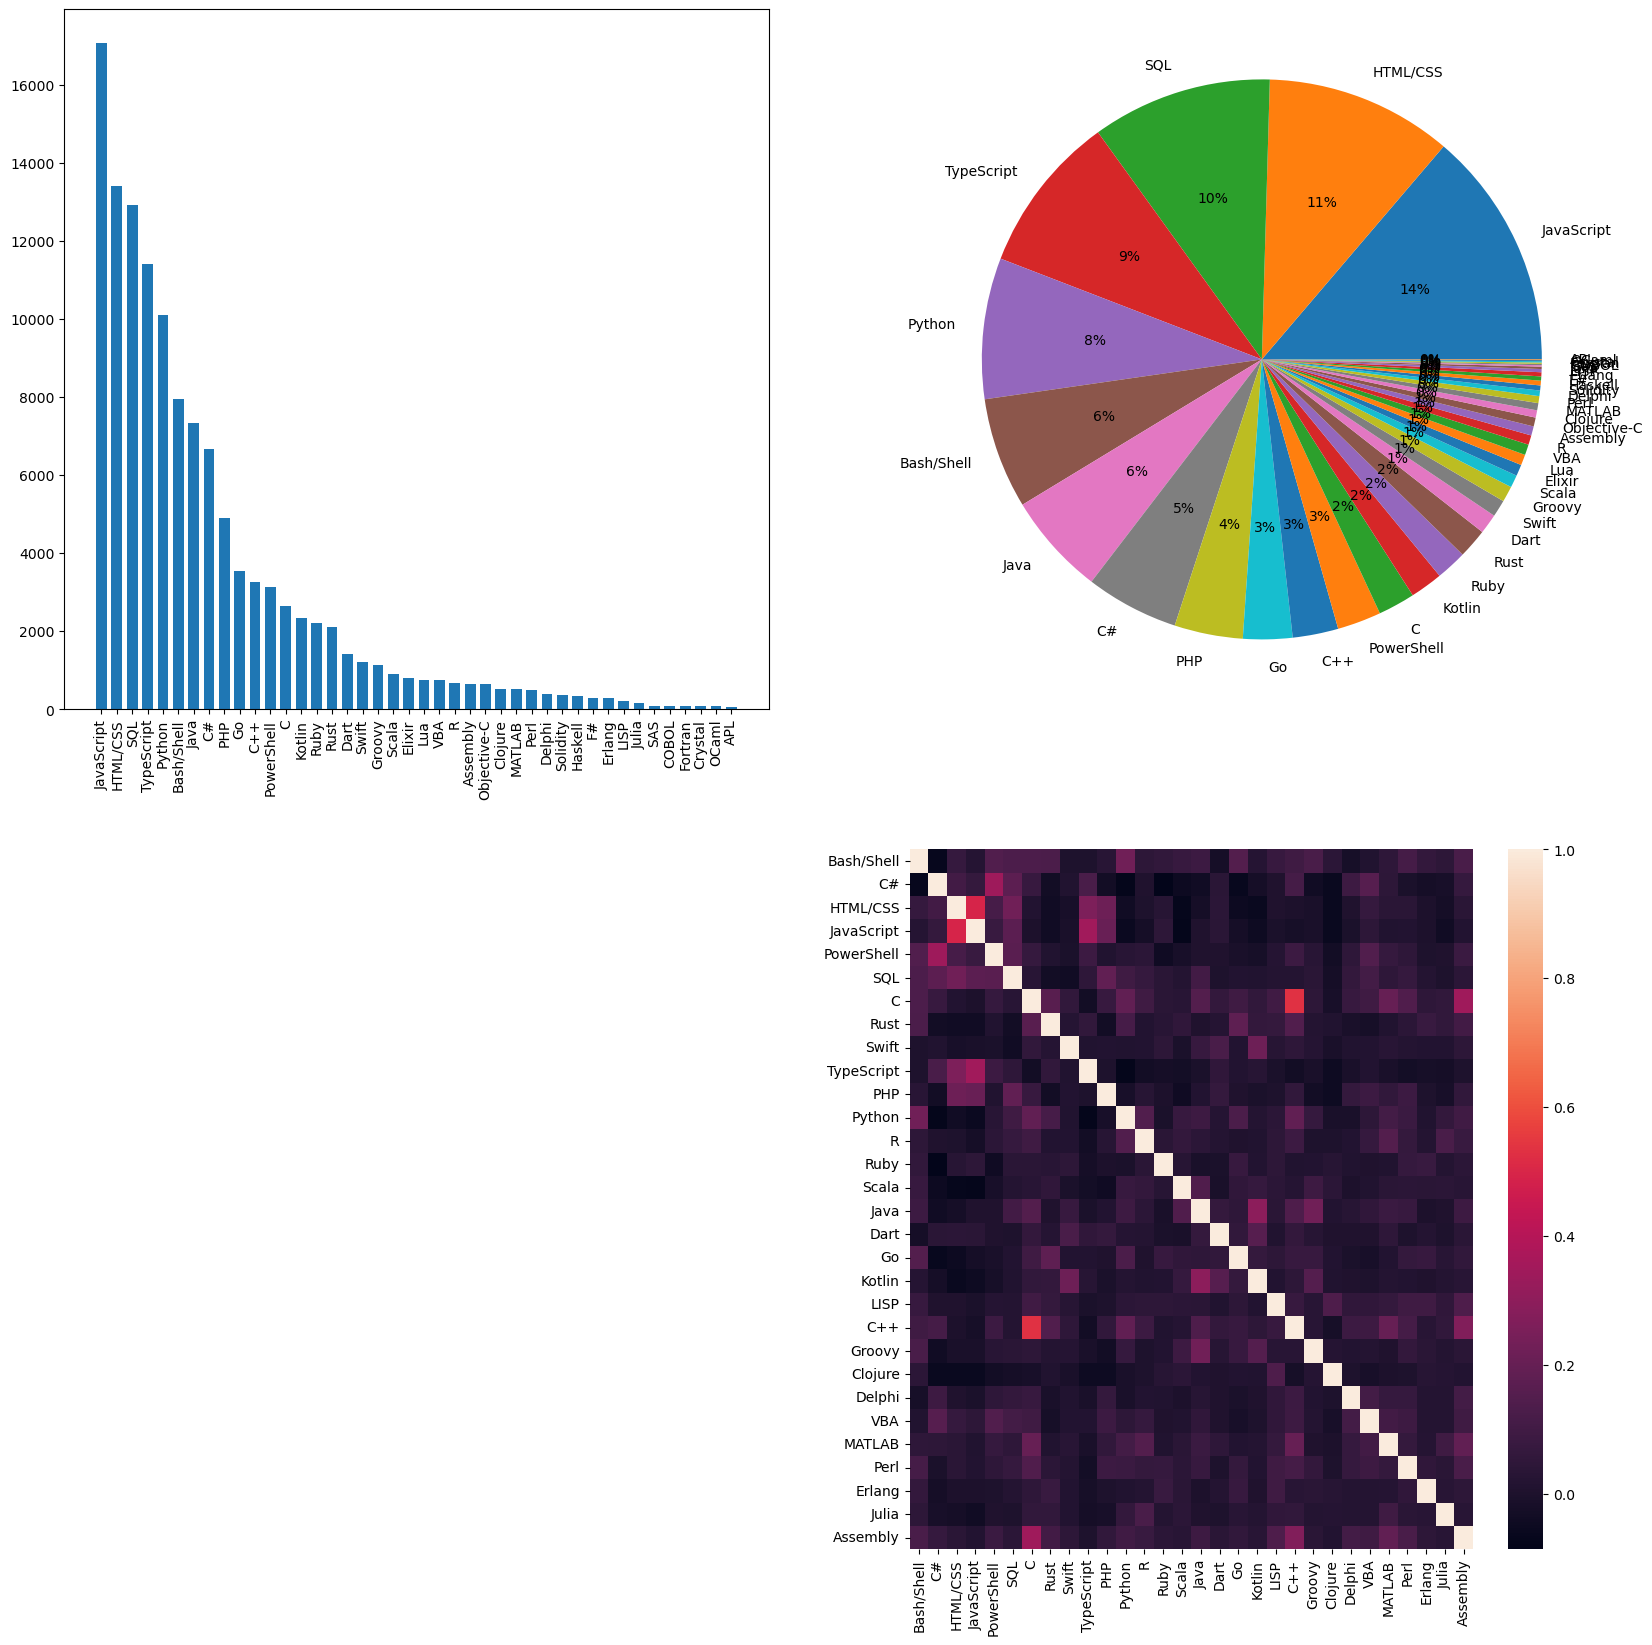

In [14]:
language = split_multicolumn(df["LanguageHaveWorkedWith"])
language_sum = language.sum().sort_values(ascending=False)

label = language_sum.index
value = language_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.subplot(2,2,4)
sns.heatmap(language.iloc[:, :30].corr())

plt.show()


# `PlatformHaveWorkedWith`

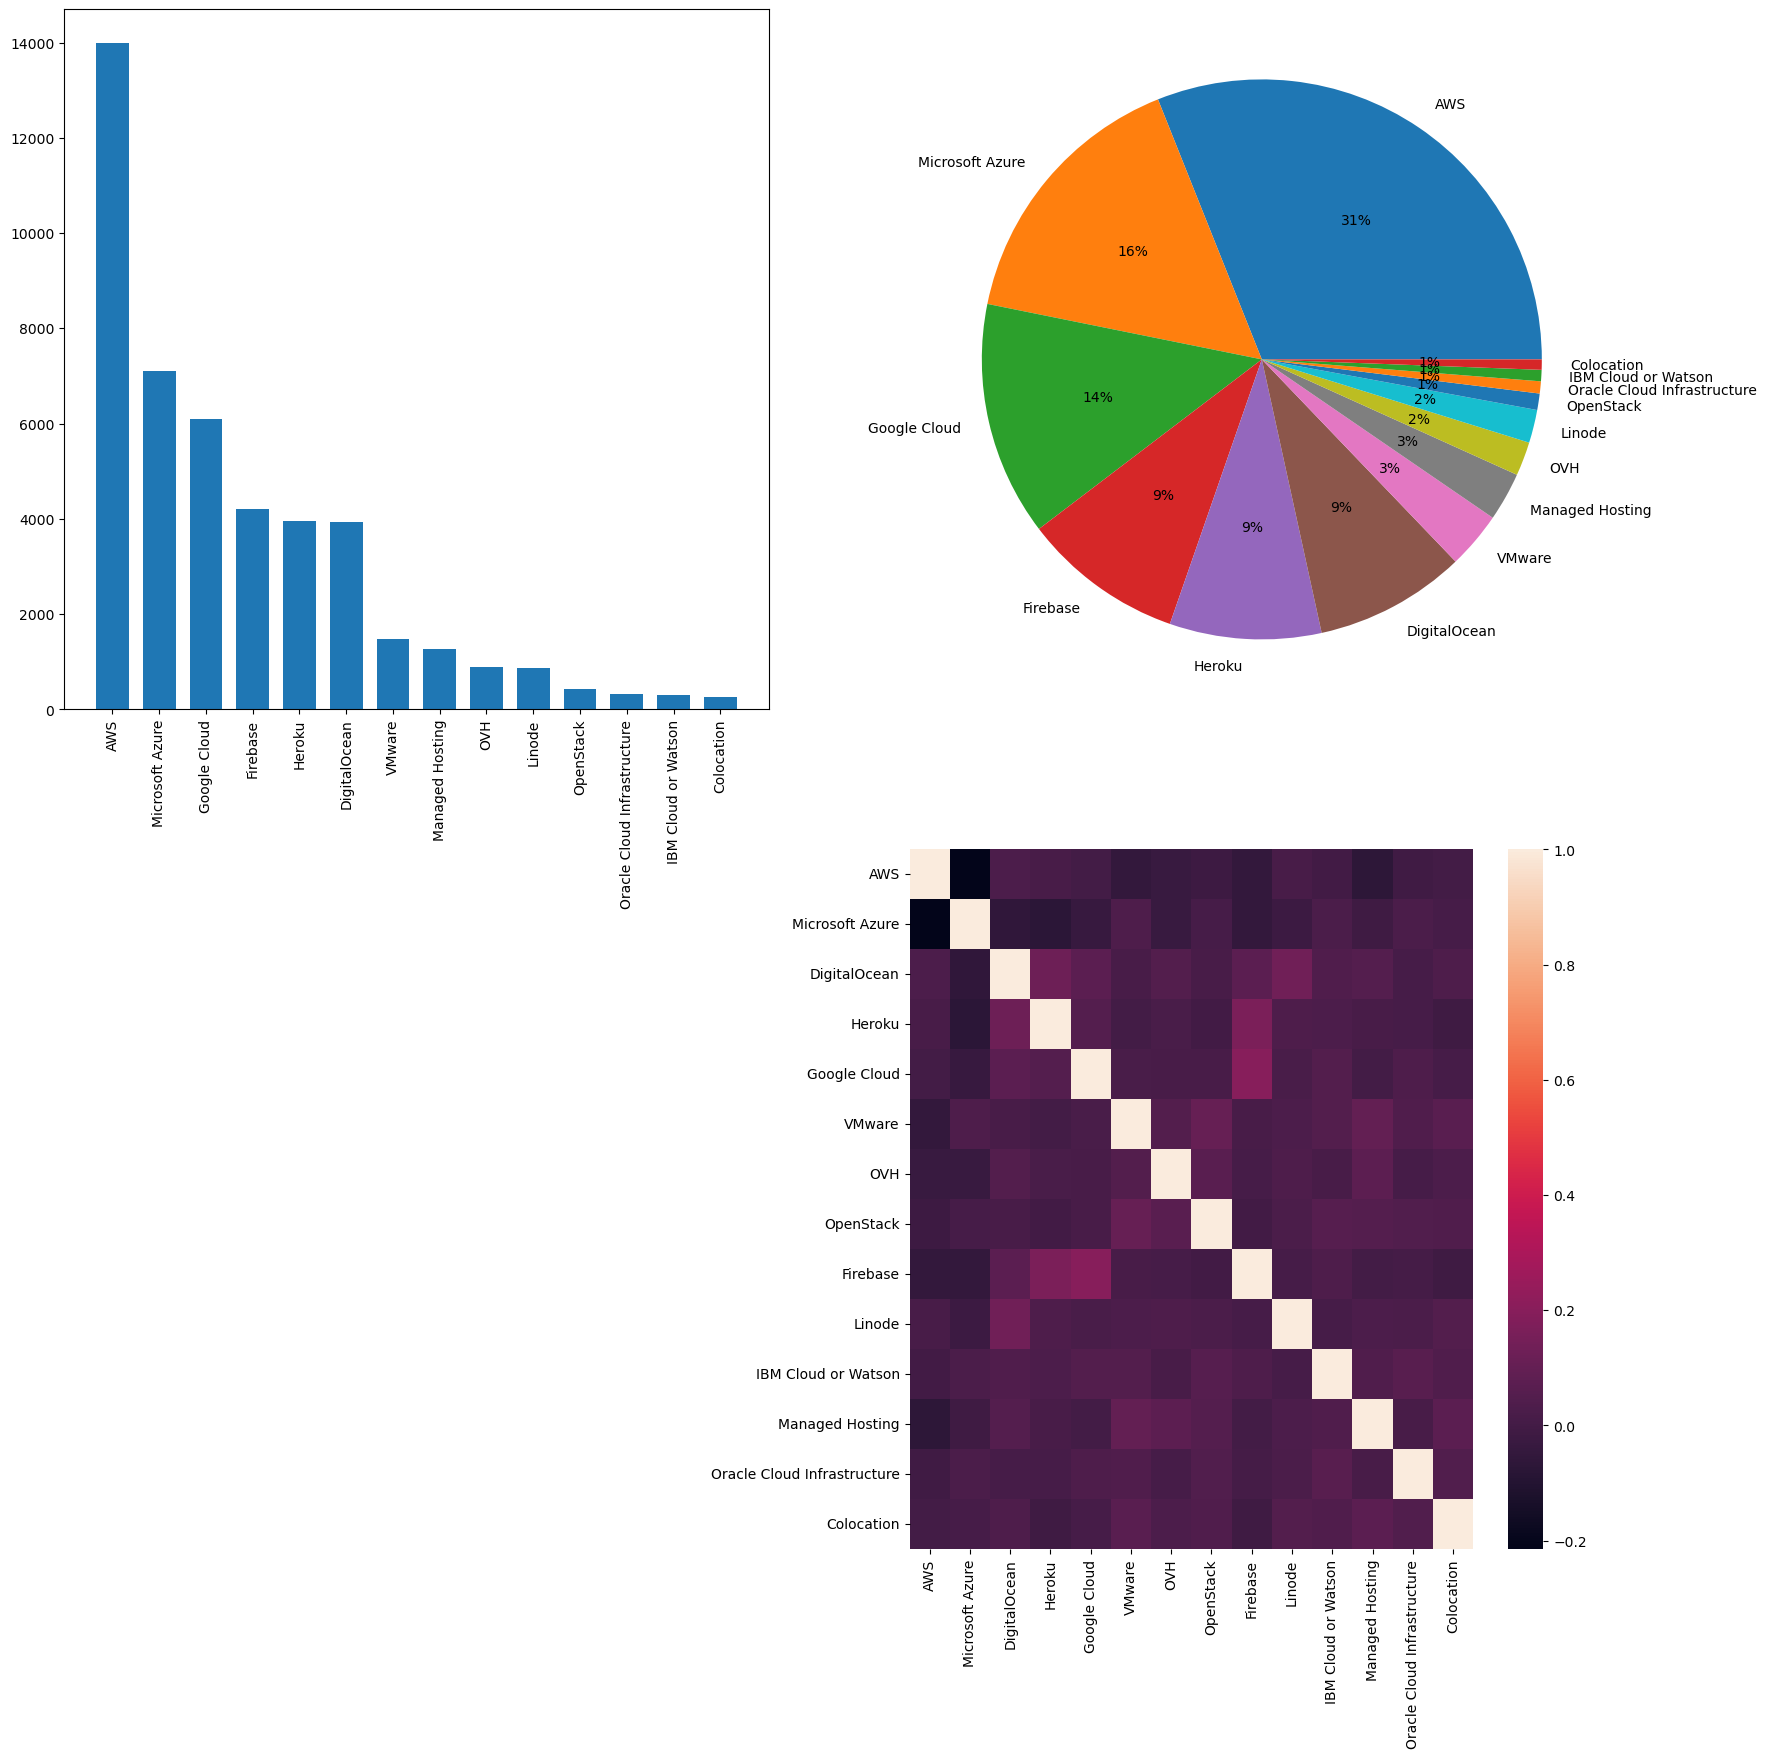

In [15]:
platform = split_multicolumn(df["PlatformHaveWorkedWith"])
platform_sum = platform.sum().sort_values(ascending=False)

label = platform_sum.index
value = platform_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.subplot(2,2,4)
sns.heatmap(platform.iloc[:, :30].corr())

plt.show()

# `ToolsTechHaveWorkedWith`

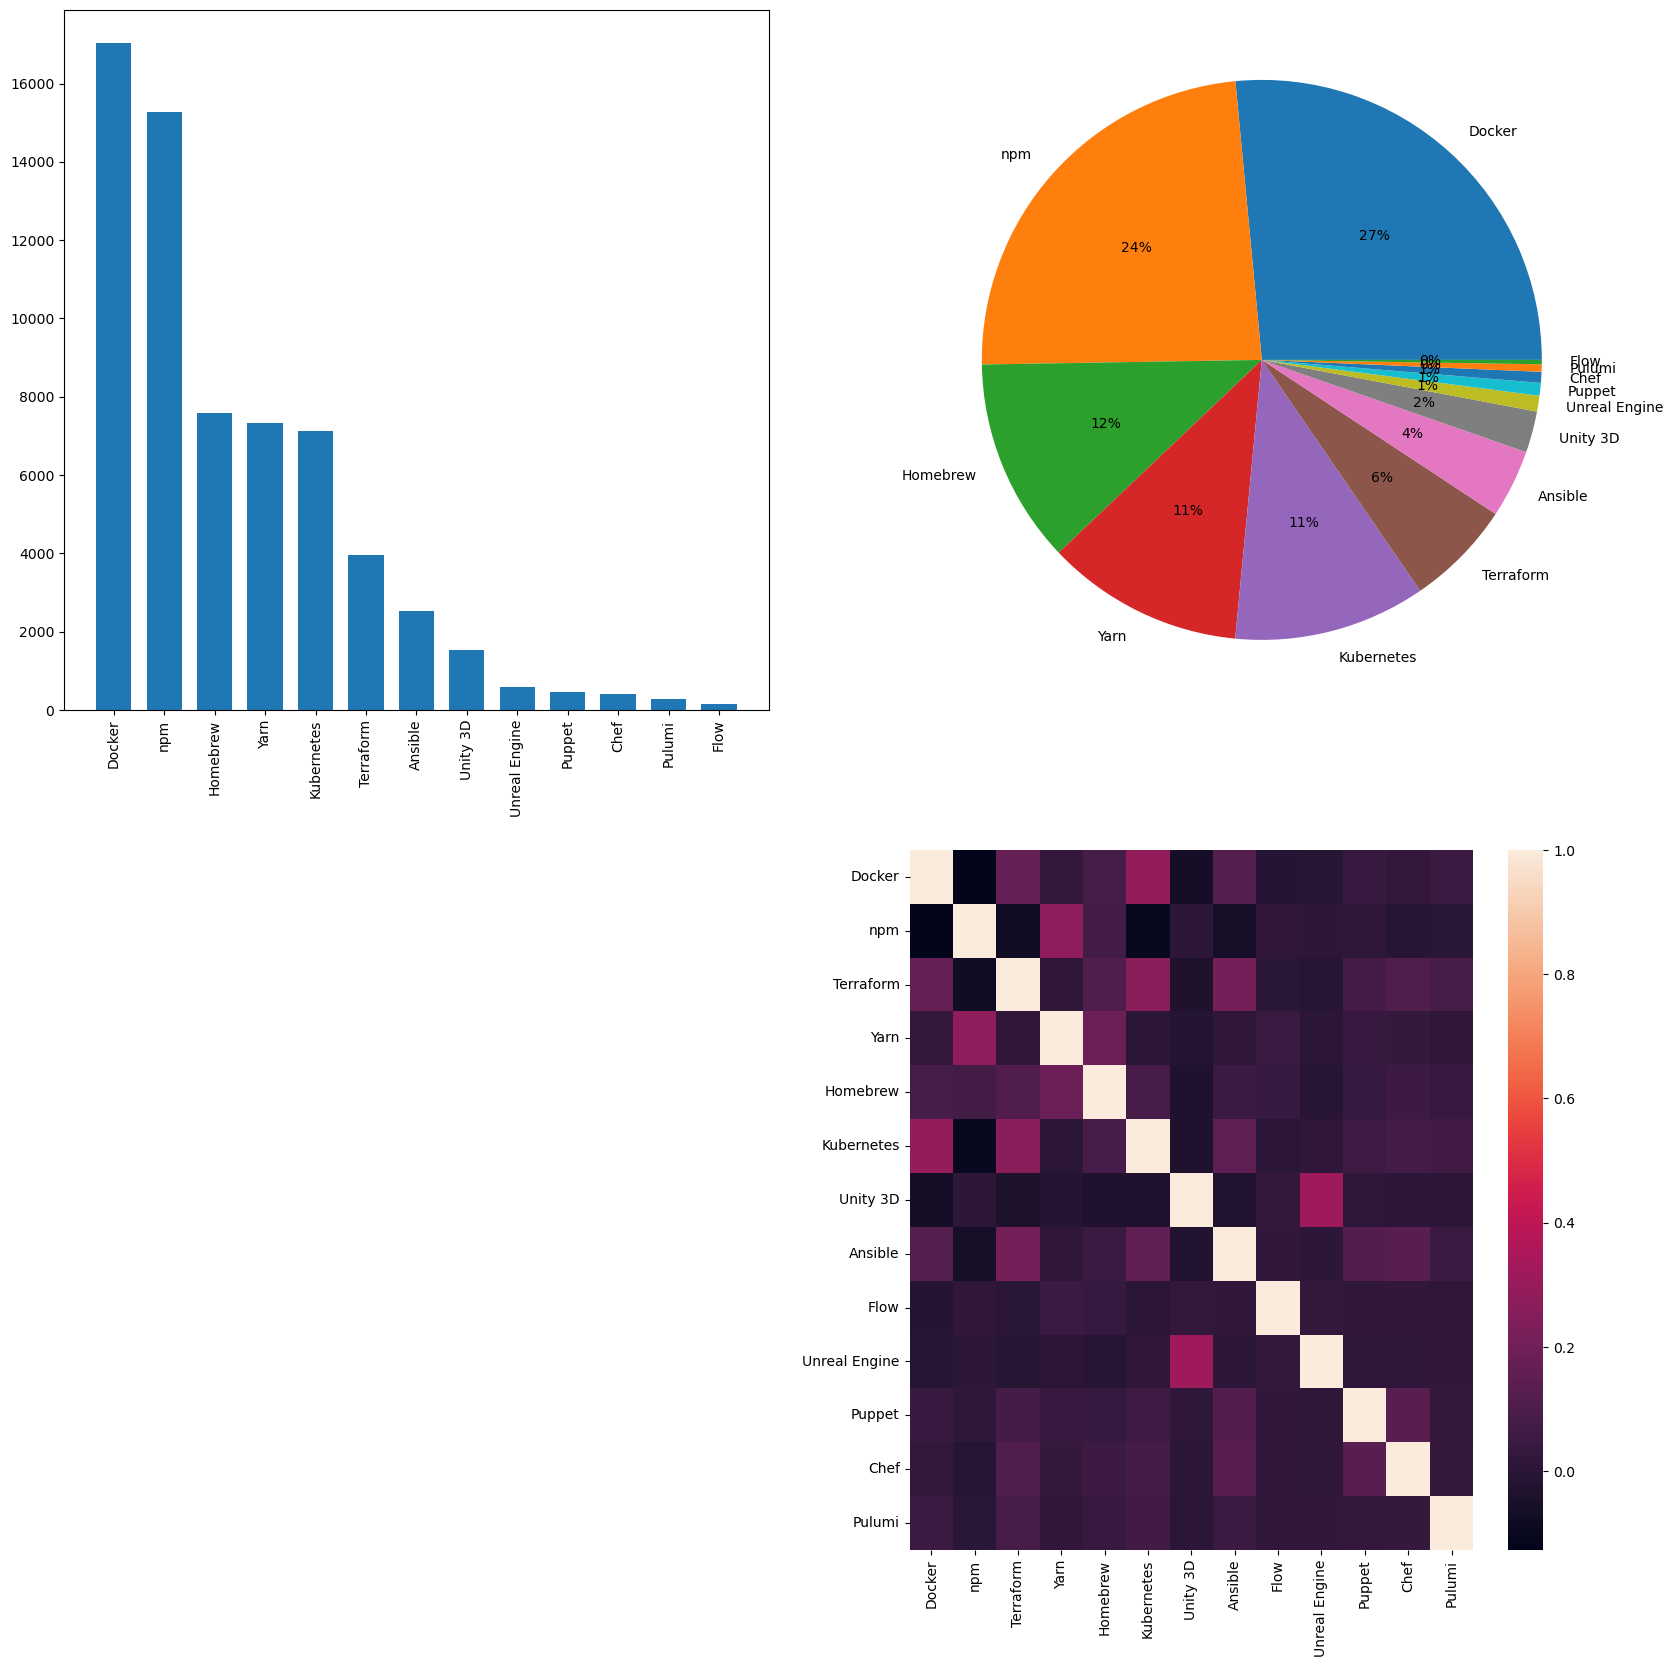

In [16]:
tool = split_multicolumn(df["ToolsTechHaveWorkedWith"])
tool_sum = tool.sum().sort_values(ascending=False)

label = tool_sum.index
value = tool_sum.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.subplot(2,2,4)
sns.heatmap(tool.iloc[:, :30].corr())

plt.show()

# `Salary`

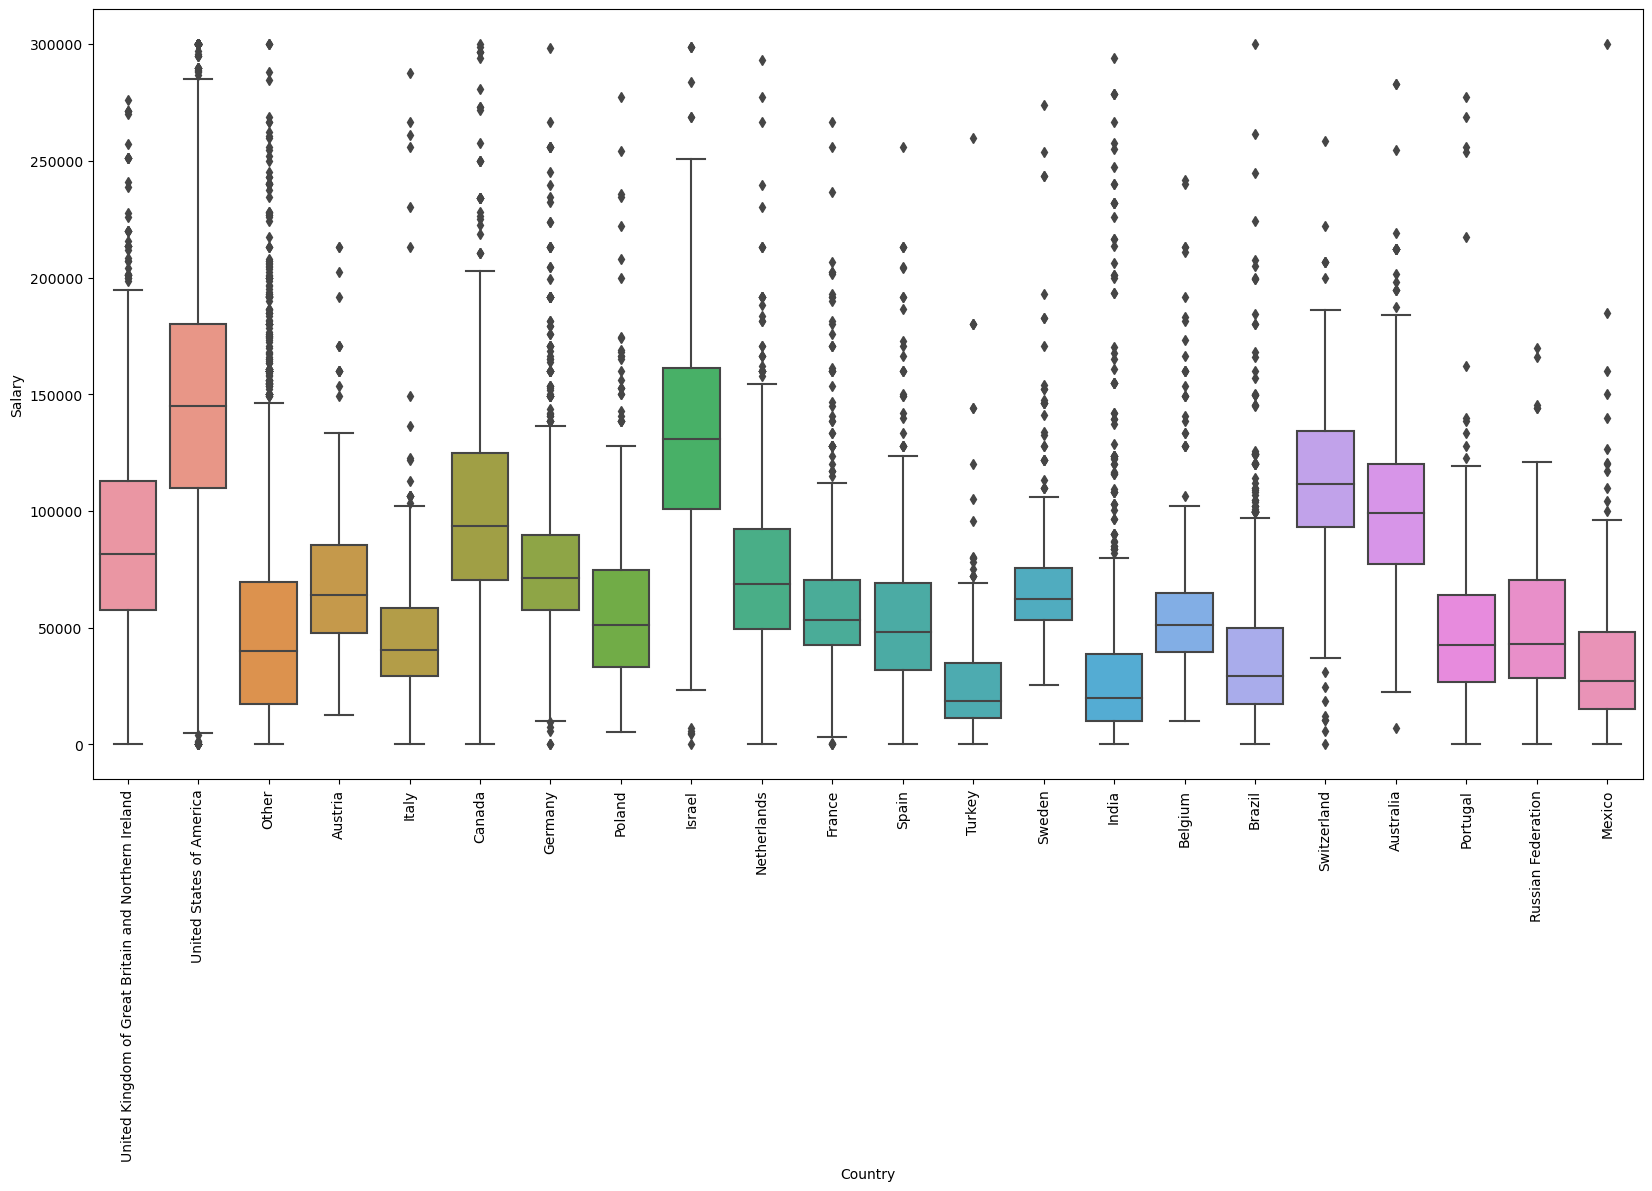

In [17]:
temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]
plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary")
plt.xticks(rotation=90)
plt.show()

In [18]:
df = load_df()
print(f"Dataframe shape: {df.shape}")
df.head(3)

Dataframe shape: (21283, 50)


,RemoteWork,EdLevel,YearsCodePro,Country,Age,Salary,"Developer, full-stack","Developer, back-end","Developer, front-end",DevOps specialist,Cloud infrastructure engineer,"Developer, desktop or enterprise applications","Developer, mobile",Database administrator,Engineering manager,System administrator,"Engineer, data",Project manager,"Developer, QA or test","Developer, embedded applications or devices",Designer,Data scientist or machine learning specialist,"Engineer, site reliability",JavaScript,HTML/CSS,SQL,TypeScript,Python,Bash/Shell,Java,C#,PHP,Go,C++,PowerShell,C,Kotlin,Ruby,Rust,AWS,Microsoft Azure,Google Cloud,Firebase,Heroku,DigitalOcean,Docker,npm,Homebrew,Yarn,Kubernetes
10,"Hybrid (some remote, some in-person)",Bachelor’s degree,2,United Kingdom of Great Britain and Northern I...,18-24 years old,60307.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
12,"Hybrid (some remote, some in-person)",Bachelor’s degree,5,United States of America,25-34 years old,65000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,Fully remote,Master’s degree,5,United States of America,25-34 years old,110000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


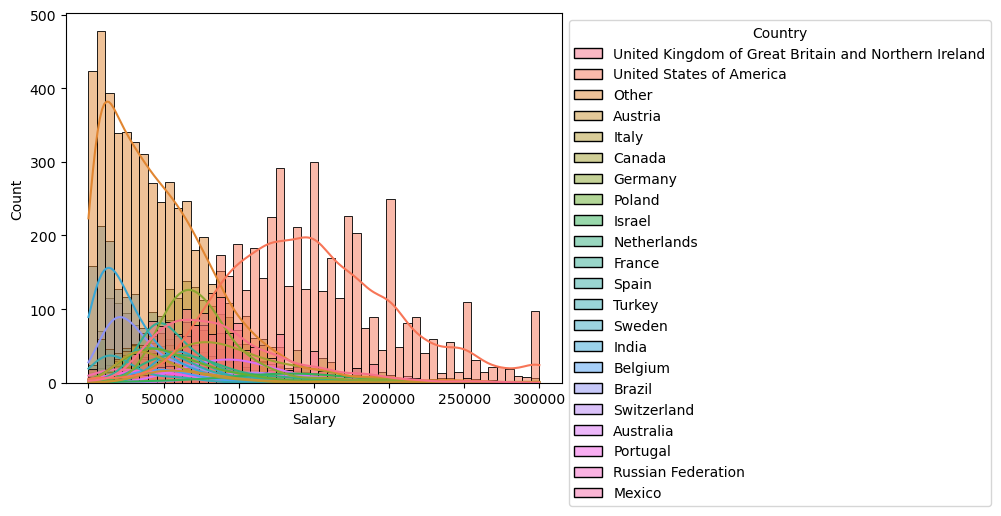

In [19]:
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

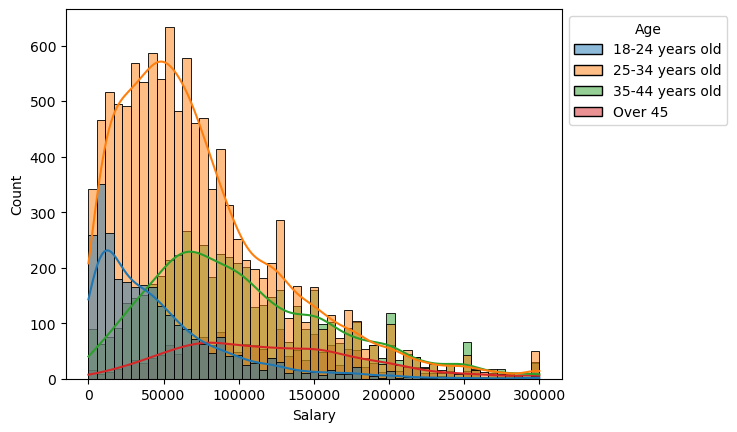

In [20]:
ax = sns.histplot(data=df, x="Salary", hue="Age", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

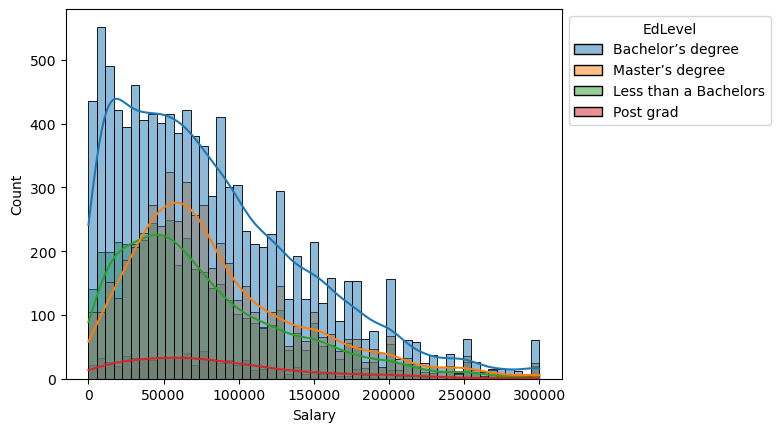

In [21]:
ax = sns.histplot(data=df, x="Salary", hue="EdLevel", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

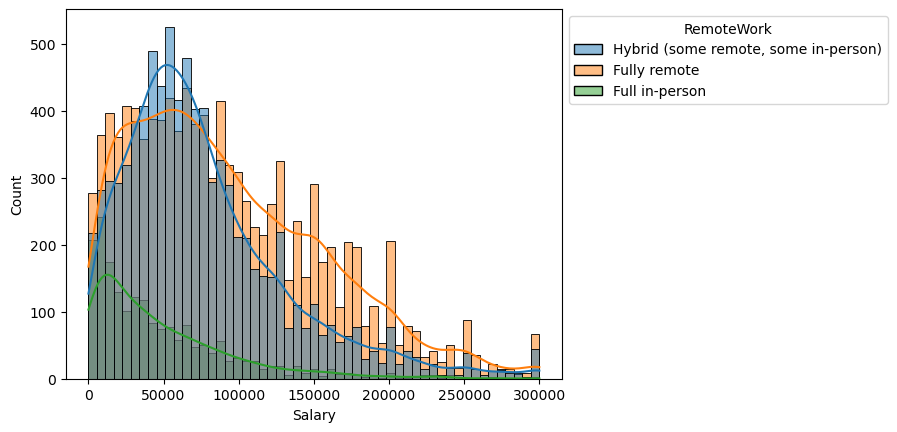

In [22]:
ax = sns.histplot(data=df, x="Salary", hue="RemoteWork", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()